In [119]:
import numpy as np
import pandas as pd

In [120]:
data_2d = pd.read_csv('data/data_2d.csv', names=('y', 'x1', 'x2'))
data_2d

,y,x1,x2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [121]:
X_2d = data_2d[['x1', 'x2']]
y_2d = data_2d.y

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

In [123]:
from sklearn.cluster import KMeans
sse_2d = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_2d_scaled)
    sse_2d.append(kmeans.inertia_)

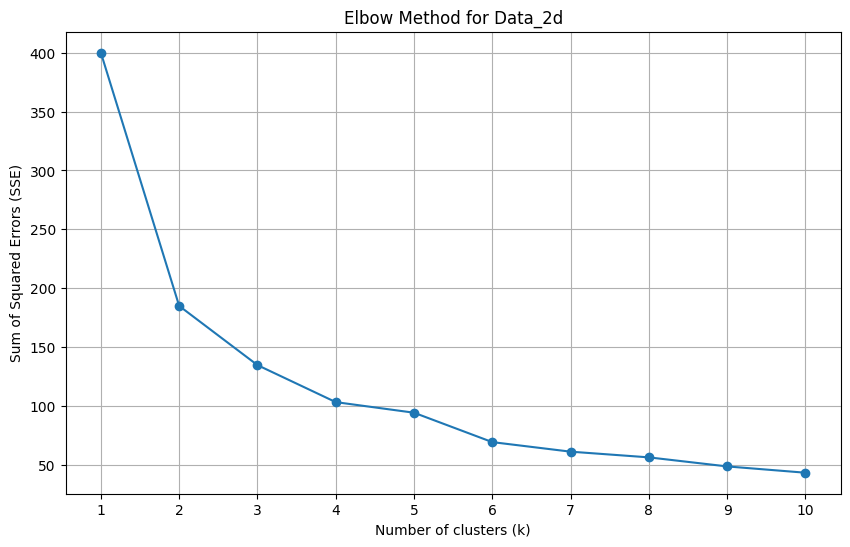

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse_2d, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Data_2d')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Text(0, 0.5, 'x2')

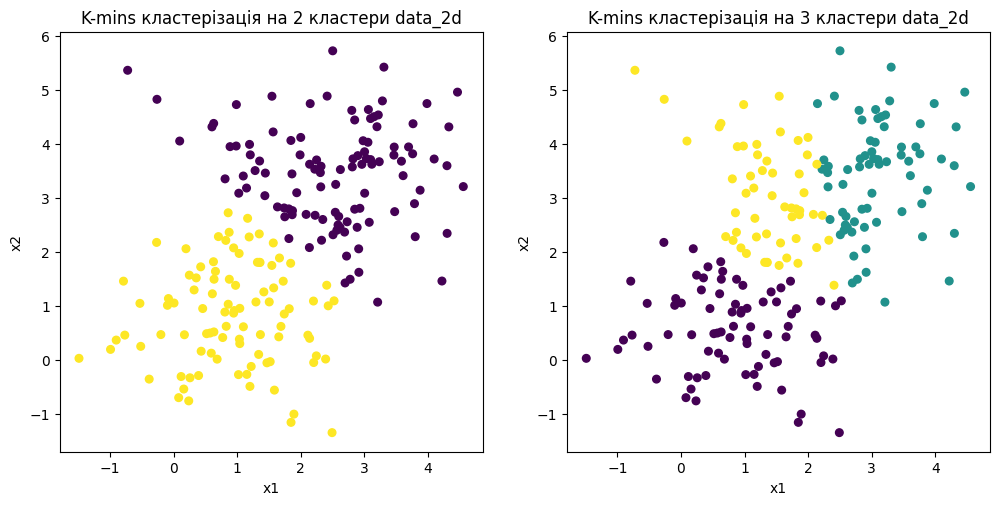

In [125]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_2d_scaled)
y_2d = kmeans.labels_
plt.scatter(data_2d['x1'], data_2d['x2'], c=y_2d, s=30)
plt.title('K-mins кластерізація на 2 кластери data_2d')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(222)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_2d_scaled)
y_2d = kmeans.labels_
plt.scatter(data_2d['x1'], data_2d['x2'], c=y_2d, s=30)
plt.title('K-mins кластерізація на 3 кластери data_2d')
plt.xlabel('x1')
plt.ylabel('x2')

In [126]:
optimal_k_2d = 2

In [127]:
data_mnist = pd.read_csv('data/mnist.csv')
data_mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
X_mnist = data_mnist.iloc[:, 1:]
y_mnist = data_mnist.iloc[:, :1]

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)
sse_mnist = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_mnist_pca)
    sse_mnist.append(kmeans.inertia_)

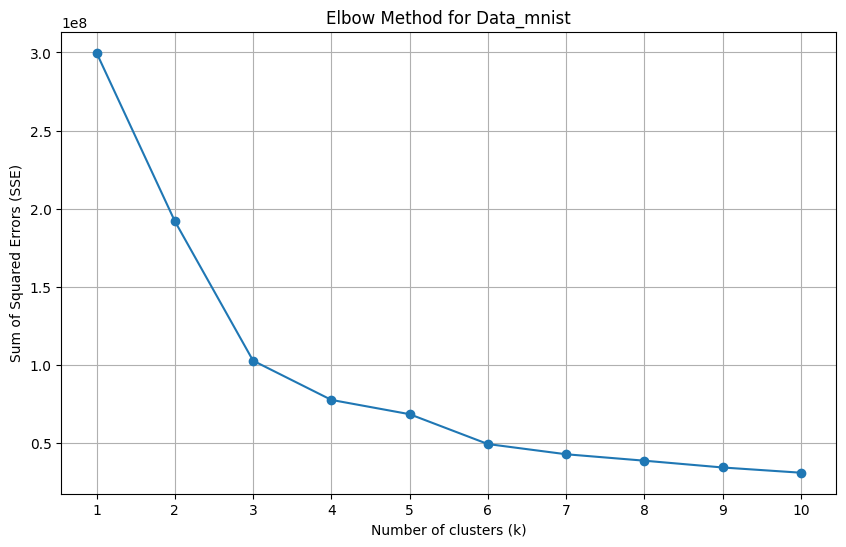

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse_mnist, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Data_mnist')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Text(0, 0.5, 'x2')

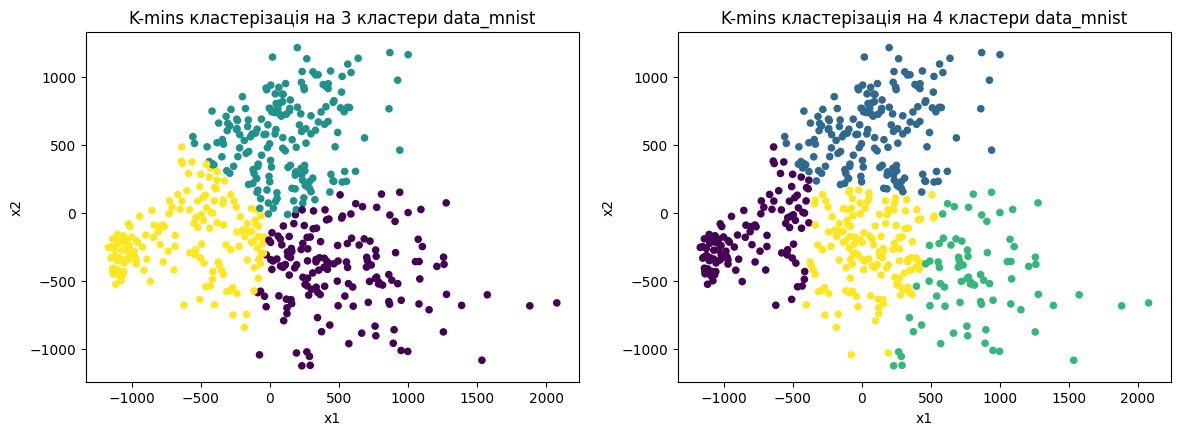

In [131]:
plt.figure(figsize=(14,10))

plt.subplot(221)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_mnist_pca)
labels = kmeans.labels_
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels, s=20)
plt.title('K-mins кластерізація на 3 кластери data_mnist')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(222)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_mnist_pca)
labels = kmeans.labels_
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels, s=20)
plt.title('K-mins кластерізація на 4 кластери data_mnist')
plt.xlabel('x1')
plt.ylabel('x2')

In [132]:
optimal_k_mnist = 3